# Análisis Exploratorio de Datos - Google reviews:

En el presente notebook se realizará un análisis exploratorio de los datos de **reviews** de **restaurantes** realizadas en **Google Maps** en el **estado** de **California**.

En primer lugar, analizaremos la información correspondiente a las **reviews** de **usuarios** de la aplicación, para luego complementar con la información relativa a los **locales** sobre los que se realizó la review, más específicamente, sobre **restaurantes**:

In [1]:
# En primer lugar, se importan las librerías con las que se va a trabajar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import gc

## Reviews de usuarios:

Tal cual se explicó anteriormente, este dataset incluye las reviews realizadas por usuarios:

In [110]:
# En primer lugar, se carga el archivo:
df_reviews = pd.read_parquet("Datasets/reviews_california.parquet")
df_reviews.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49


In [80]:
# Se controla información general del dataset:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700000 entries, 0 to 2699999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 164.8+ MB


Se eliminan las columnas que no se utilizarán en el análisis:

In [111]:
df_reviews = df_reviews.drop(columns=["pics", "resp"])

In [112]:
# Se controla que no existan filas duplicadas:
df_reviews.duplicated().sum()

75243

In [113]:
# Se eliminan valores duplicados:
df_reviews = df_reviews.drop_duplicates()
df_reviews.shape

(2624757, 6)

In [114]:
# Se controla la cantidad de valores nulos:
df_reviews.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1163823
gmap_id          0
dtype: int64

De acuerdo a lo expuesto, existe una **gran cantidad de valores faltantes** en la columna **"text"**, que contiene los **comentarios de las reviews** realizadas por el usuario. 

Se decide **mantener** las mismas, ya que correspoden a casi el 50% de la información del dataset y por ende estaríamos eliminando información importante, y a su vez tal vez podamos implementar algún método para completar los mismos a través del rating ingresado por el usuario.

Por tal motivo, procedemos a controlar los valores numéricos del dataset:

In [99]:
df_reviews.describe()

,user_id,time,rating
count,2.624757e+06,2.624757e+06,2.624757e+06
mean,1.093545e+20,1.551619e+12,4.314976e+00
std,5.238718e+18,4.646347e+10,1.123238e+00
min,1.000000e+20,6.626016e+11,1.000000e+00
25%,1.048919e+20,1.523132e+12,4.000000e+00
50%,1.093178e+20,1.555369e+12,5.000000e+00
75%,1.138792e+20,1.582401e+12,5.000000e+00
max,1.184467e+20,1.631149e+12,5.000000e+00


Podemos observar que el **valor mínimo** en **"rating"** es **1**, mientras que el **valor máximo** es **5**, por lo que supone una **escala** de calificaciones de **1 a 5 estrellas**.

Teniendo esto presente, ahora podemos **reemplazar** los **valores nulos** en los comentarios, a través de una **escala de satisfacción** basada en el **rating ingresado por el usuario**, a saber:

    - Rating menor o igual a 1: "Very Dissatisfied"
    - Rating menor o igual a 2: "Dissatisfied"
    - Rating menor o igual a 3: "Neutral"
    - Rating menor o igual a 4: "Satisfied"
    - Rating menor o igual a 5: "Very Satisfied"

In [100]:
# En primer lugar, creamos la función que asignará la escala de satisfacción:
def asignar_escala(rating):
    if rating <= 1:
        return "Very Dissatisfied"
    elif rating <= 2:
        return "Dissatisfied"
    elif rating <= 3:
        return "Neutral"
    elif rating <= 4:
        return "Satisfied"
    else:
        return "Very Satisfied"

In [115]:
# Luego creamos una columna en el dataframe donde aplicamos la funcion creada anteriormente:
df_reviews["escala_satisfaccion"] = df_reviews["rating"].apply(asignar_escala)
df_reviews.head()

,user_id,name,time,rating,text,gmap_id,escala_satisfaccion
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Very Satisfied
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Very Satisfied
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Satisfied
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Very Satisfied
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Very Satisfied


In [116]:
# Reemplazamos valores nulos:
df_reviews["text"].fillna(df_reviews["escala_satisfaccion"], inplace = True)

# Controlamos que no queden valores nulos en el dataframe:
df_reviews.isnull().sum()

user_id                0
name                   0
time                   0
rating                 0
text                   0
gmap_id                0
escala_satisfaccion    0
dtype: int64

In [117]:
# Eliminamos la columna agregada anteriormente:
df_reviews = df_reviews.drop(columns="escala_satisfaccion")

Observamos que contiene la columna "time":

In [104]:
df_reviews["time"]

0          1609909927056
1          1612849648663
2          1583643882296
3          1551938216355
4          1494910901933
               ...      
2699995    1573362674409
2699996    1580608853411
2699997    1528597806165
2699998    1551203379295
2699999    1553880485978
Name: time, Length: 2624757, dtype: int64

Aparentemente la columna "time" incluye una marca de tiempo (timestamp) en milisegundos, por lo que a continuación la convertimos en fecha:

In [107]:
from datetime import datetime

# Creamos una funcion para obtener el timestamp en segundos:
def convertir_timestamp(milisegundo):
    timestamp_seg = milisegundo / 1000
    fecha_hora = datetime.utcfromtimestamp(timestamp_seg)
    return fecha_hora

In [118]:
# Creamos la columna "fecha" utilizando la funcion creada anteriormente:
df_reviews["fecha"] = df_reviews["time"].apply(convertir_timestamp)
df_reviews.head()

,user_id,name,time,rating,text,gmap_id,fecha
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-01-06 05:12:07.056
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021-02-09 05:47:28.663
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020-03-08 05:04:42.296
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019-03-07 05:56:56.355
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017-05-16 05:01:41.933


Una vez creada la columna fecha, eliminamos la columna original:

In [119]:
df_reviews = df_reviews.drop(columns="time").reset_index(drop=True)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624757 entries, 0 to 2624756
Data columns (total 6 columns):
 #   Column   Dtype         
---  ------   -----         
 0   user_id  float64       
 1   name     object        
 2   rating   int64         
 3   text     object        
 4   gmap_id  object        
 5   fecha    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 120.2+ MB


Se exporta el archivo en formato parquet:

In [120]:
df_reviews.to_parquet("reviews_google_california.parquet", engine="pyarrow")

Una vez completados los datos nulos, controlamos el Top 10 de usuarios en cantidad de reviews:

In [19]:
top_user_reviews = df_reviews["user_id"].value_counts()
top_user_reviews.head(10)

user_id
1.033885e+20    307
1.077740e+20    144
1.030183e+20    130
1.119374e+20    130
1.150273e+20    125
1.164464e+20    110
1.055059e+20    105
1.087680e+20    104
1.056125e+20    104
1.021802e+20    102
Name: count, dtype: int64

## Locales (metadata)

La **"metadata"** corresponde a la **información de** los diferentes **locales/comercios incluidos** en **Google Maps**, en este caso en particular, para el estado de **California**.

In [121]:
# Se carga el archivo co:
metadata_california = pd.read_parquet("Datasets/metadata_california.parquet")
metadata_california.head()

,index,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,1,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Accessibility': None, 'Activities': None, 'A...",Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,2,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5:30PM,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,3,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,[Restaurant],4.5,18,None,"[[Thursday, 11AM–9:30PM], [Friday, 11AM–9:30PM...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 9:30PM,None,https://www.google.com/maps/place//data=!4m2!3...
4,4,Black Tie Ski Rental Delivery of Mammoth,"Black Tie Ski Rental Delivery of Mammoth, 501 ...",0x80960c29f2e3bf29:0x4b291f0d275a5699,None,37.638754,-118.966055,"[Ski rental service, Snowboard rental service]",5.0,34,None,"[[Thursday, 8AM–5PM], [Friday, 8AM–5PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5PM,"[0x80960dcd6ba76731:0x9a6875ced2f9228e, 0x8096...",https://www.google.com/maps/place//data=!4m2!3...


In [122]:
# Se controla la información general del dataset:
metadata_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73405 entries, 0 to 73404
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             73405 non-null  int64  
 1   name              73403 non-null  object 
 2   address           72978 non-null  object 
 3   gmap_id           73405 non-null  object 
 4   description       11072 non-null  object 
 5   latitude          73405 non-null  float64
 6   longitude         73405 non-null  float64
 7   category          73334 non-null  object 
 8   avg_rating        73405 non-null  float64
 9   num_of_reviews    73405 non-null  int64  
 10  price             10853 non-null  object 
 11  hours             63907 non-null  object 
 12  MISC              66572 non-null  object 
 13  state             64610 non-null  object 
 14  relative_results  69916 non-null  object 
 15  url               73405 non-null  object 
dtypes: float64(3), int64(2), object(11)
memo

In [123]:
# En primer lugar, eliminamos las columnas que no vamos a utilizar:
metadata_california = metadata_california.drop(columns=["address","price", "hours", "state", "relative_results", "url"])

In [124]:
# Se controla la cantidad de valores nulos:
metadata_california.isnull().sum()

index                 0
name                  2
gmap_id               0
description       62333
latitude              0
longitude             0
category             71
avg_rating            0
num_of_reviews        0
MISC               6833
dtype: int64

Como podemos observar, existen valores faltantes en las columnas "name", "description", "category" y "MISC". Los primeros se pueden eliminar del análisis ya que tan solo son dos valores y el nombre del restaurant es un atributo que no se puede inventar; en el caso de los faltantes en la descripción se decide no aplicar ningun tratamiento, ya que no se trata de información de vital importancia.

Por otro lado, observamos los valores faltantes en "category" y "MISC":

In [125]:
# Eliminamos valores faltantes en "name":
metadata_california = metadata_california.dropna(subset="name")

# Observamos valores faltantes en "category":
metadata_california[metadata_california["category"].isnull()]

,index,name,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,MISC
79,79,Lollicup Tea Zone,0x80c32df622fc92f7:0xd8c1a870131805f8,Chain cafe serving Taiwanese bubble teas & sna...,34.055650,-117.737841,None,4.2,25,None
286,286,Charlie's Cafe,0x809adf921282c90f:0x36d67b3abfc5983,None,38.711577,-121.289970,None,3.0,8,None
411,411,Stoner's,0x80858097728d4253:0x11b0f09640b062ff,"Low-key eatery serving hot & cold sandwiches, ...",37.782473,-122.420511,None,4.5,24,None
1209,1209,Buckley Orchards,0x8091e41abeee1c23:0xb8391400bc8641f8,None,37.033581,-121.524195,None,4.8,8,None
2763,3978,Latigo Beach Access,0x80e81f546a821e59:0x2b882c582efa08fd,None,34.030615,-118.751006,None,4.6,17,None
...,...,...,...,...,...,...,...,...,...,...
60712,61927,Oak & Main,0x80e9ad047e73899b:0x517bc443d419ecfb,None,34.281173,-119.294375,None,4.2,34,None
60888,62103,Go Go Juice,0x80dd4a6e62c992b9:0xee357658bc722380,None,33.790181,-118.313681,None,4.8,38,None
62535,63750,Malibu Fish'n Tackle,0x80e8251f45bb7203:0x94354daddb4cd573,None,34.168157,-118.835528,None,4.3,18,None
67532,68747,Kelly's Kafe,0x808f86f7756bc059:0x4d0ada03dd8b86b9,None,37.783656,-122.222993,None,4.4,28,None


Observamos que en muchos casos no existen descripciones por las que pueda inferirse la categoría, por lo que se decide eliminarlas del análisis:

In [126]:
# Eliminamos valores faltantes en "category":
metadata_california = metadata_california.dropna(subset="category")

Por otro lado, observamos que contiene la columna "MISC":

In [127]:
metadata_california["MISC"]

0        {'Accessibility': ['Wheelchair accessible entr...
1        {'Accessibility': None, 'Activities': None, 'A...
2        {'Accessibility': ['Wheelchair accessible entr...
3        {'Accessibility': ['Wheelchair accessible entr...
4        {'Accessibility': ['Wheelchair accessible entr...
                               ...                        
73400    {'Accessibility': ['Wheelchair accessible entr...
73401                                                 None
73402    {'Accessibility': None, 'Activities': None, 'A...
73403    {'Accessibility': ['Wheelchair accessible entr...
73404    {'Accessibility': ['Wheelchair-accessible car ...
Name: MISC, Length: 73332, dtype: object

Como podemos observar, la columna "MISC" contiene un diccionario, por lo que realizamos la apertura por fuera del dataset original:

In [128]:
df_MISC = metadata_california[["gmap_id", "MISC"]]
df_MISC = df_MISC.reset_index().drop(columns="index")
df_MISC = pd.concat([df_MISC, pd.json_normalize(df_MISC["MISC"])], axis=1) 
df_MISC = df_MISC.drop(columns="MISC")
df_MISC.head()

,gmap_id,Accessibility,Activities,Amenities,Atmosphere,Crowd,Dining options,From the business,Getting here,Health & safety,Health and safety,Highlights,Lodging options,Offerings,Payments,Planning,Popular for,Recycling,Service options
0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,[Wheelchair accessible entrance],None,[Good for kids],[Casual],None,None,None,None,None,None,None,NaN,[Comfort food],None,None,None,None,"[Takeout, Dine-in, Delivery]"
1,0x80c2c632f933b073:0xc31785961fe826a6,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,[In-store pickup]
2,0x80c2cf163db6bc89:0x219484e2edbcfa41,[Wheelchair accessible entrance],None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None
3,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,[Wheelchair accessible entrance],None,[Good for kids],[Casual],[College students],"[Lunch, Dinner]",None,None,"[Mask required, Staff wear masks, Staff requir...",None,None,NaN,"[Comfort food, Quick bite, Small plates]",None,None,"[Lunch, Dinner, Solo dining]",None,"[Outdoor seating, Curbside pickup, No-contact ..."
4,0x80960c29f2e3bf29:0x4b291f0d275a5699,[Wheelchair accessible entrance],None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None


Debido a que los datos en "MISC" contienen información acerca de las características o misceláneos de los locales que pueden llegar a ser utilizados en un futuro, se mantienen en un dataset aparte y se eliminan del original:

In [129]:
# Eliminamos la columna "MISC" del dataframe original:
metadata_california = metadata_california.drop(columns="MISC")

# Controlamos la cantidad de valores nulos luego de los ajustes realizados:
metadata_california.isnull().sum()

index                 0
name                  0
gmap_id               0
description       62271
latitude              0
longitude             0
category              0
avg_rating            0
num_of_reviews        0
dtype: int64

Una vez ajustamos toda la data correspondiente a los locales de California, **filtramos** aquellos que entran en la categoría específica de **restaurantes**:

In [130]:
# Observamos el total de categorias comprendidas en los locales
categorias = metadata_california["category"].explode().unique()
categorias

array(['Korean restaurant', 'Fabric store', 'Restaurant', ...,
       'Angler fish restaurant', 'Contemporary Louisiana restaurant',
       'Office of Vital Records'], dtype=object)

Analizamos el total de categorías:

In [131]:
len(categorias)

3043

Existen 3043 categorías, de las cuales sólo nos interesa aquellos que contienen la palabra "restaurant", por lo que se buscaran filtrar las mismas:

In [132]:
# Se abre el dataframe en las diferentes categorías
apertura_cat = metadata_california.explode("category")
apertura_cat = apertura_cat.reset_index()
apertura_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168529 entries, 0 to 168528
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   level_0         168529 non-null  int64  
 1   index           168529 non-null  int64  
 2   name            168529 non-null  object 
 3   gmap_id         168529 non-null  object 
 4   description     37566 non-null   object 
 5   latitude        168529 non-null  float64
 6   longitude       168529 non-null  float64
 7   category        168529 non-null  object 
 8   avg_rating      168529 non-null  float64
 9   num_of_reviews  168529 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 12.9+ MB


In [133]:
# Se determina la palabra clave a buscar:
palabra_clave = "restaurant"

# Se establece el fltro por palabra clave:
filtro = apertura_cat["category"].str.contains(palabra_clave, case=False)

# Se crea el dataframe que incluye info únicamente de restaurantes:
restaurantes = apertura_cat[filtro]
restaurantes.head()

,level_0,index,name,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,0,0,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,Korean restaurant,4.4,18
3,3,3,Vons Chicken,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,None,33.916402,-118.010855,Restaurant,4.5,18
107,52,52,La Potranca,0x80c2baf50d29bf63:0x5bd904b842b9fcc,None,34.000181,-118.441249,Restaurant,4.2,13
173,81,81,Cowboy Burgers & BBQ,0x80c2d765f8c90a3d:0x16afb75943e7ad50,"American grub such as BBQ ribs, hamburgers, sa...",34.079995,-117.988951,Hamburger restaurant,3.7,38
174,81,81,Cowboy Burgers & BBQ,0x80c2d765f8c90a3d:0x16afb75943e7ad50,"American grub such as BBQ ribs, hamburgers, sa...",34.079995,-117.988951,American restaurant,3.7,38


In [134]:
# Se chequea info general del dataframe:
restaurantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16285 entries, 0 to 168518
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         16285 non-null  int64  
 1   index           16285 non-null  int64  
 2   name            16285 non-null  object 
 3   gmap_id         16285 non-null  object 
 4   description     8471 non-null   object 
 5   latitude        16285 non-null  float64
 6   longitude       16285 non-null  float64
 7   category        16285 non-null  object 
 8   avg_rating      16285 non-null  float64
 9   num_of_reviews  16285 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.4+ MB


In [135]:
# Se resetean el indice y eliminan columnas innecesarias:
restaurantes = restaurantes.drop(columns=["level_0", "index"])
restaurantes = restaurantes.reset_index()
restaurantes = restaurantes.drop(columns=["index"])

El dataset contiene información de **más de 16.000** restaurantes.

Luego se observan la cantidad de restaurantes por categoría:

In [136]:
restaurantes["category"].value_counts()

category
Restaurant                           3769
Mexican restaurant                   1259
Fast food restaurant                 1146
Takeout Restaurant                    851
Pizza restaurant                      703
                                     ... 
Chophouse restaurant                    1
Czech restaurant                        1
Venezuelan restaurant                   1
Yucatan restaurant                      1
Contemporary Louisiana restaurant       1
Name: count, Length: 203, dtype: int64

Observamos la totalidad de tipologías de restaurant existentes:

In [137]:
categorias_restaurantes = restaurantes["category"].unique()
categorias_restaurantes.sort()
categorias_restaurantes

array(['Afghani restaurant', 'African restaurant', 'American restaurant',
       'Angler fish restaurant', 'Argentinian restaurant',
       'Armenian restaurant', 'Asian fusion restaurant',
       'Asian restaurant', 'Australian restaurant', 'Austrian restaurant',
       'Authentic Japanese restaurant', 'Bangladeshi restaurant',
       'Bar restaurant furniture store', 'Barbecue restaurant',
       'Basque restaurant', 'Belgian restaurant', 'Biryani restaurant',
       'Brazilian restaurant', 'Breakfast restaurant',
       'British restaurant', 'Brunch restaurant', 'Buffet restaurant',
       'Burmese restaurant', 'Burrito restaurant', 'Cajun restaurant',
       'Californian restaurant', 'Cambodian restaurant',
       'Cantonese restaurant', 'Caribbean restaurant',
       'Central American restaurant', 'Cheesesteak restaurant',
       'Chicken restaurant', 'Chicken wings restaurant',
       'Chilean restaurant', 'Chinese noodle restaurant',
       'Chinese restaurant', 'Chophouse resta

Debido a que nuestro trabajo se concentrará en **restaurantes de comida latinoamericana**, filtramos los mismos en el dataset:

In [138]:
# Guardamos las categorías de restaurantes latinoamericanos en una lista
latin_list = ['Argentinian restaurant', 'Brazilian restaurant', 'Burrito restaurant', 'Caribbean restaurant',
       'Central American restaurant', 'Chilean restaurant', 'Colombian restaurant', 'Cuban restaurant', 
       'Ecuadorian restaurant', 'Latin American restaurant','Mexican restaurant','Taco restaurant',  'Venezuelan restaurant',
       'Yucatan restaurant']

# Luego filtramos los restaurantes latinoamericanos en el dataframe:
latin_restaurants = restaurantes[restaurantes["category"].isin(latin_list)]
latin_restaurants = latin_restaurants.reset_index()
latin_restaurants = latin_restaurants.drop(columns="index")
latin_restaurants.head()

,name,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews
0,Cowboy Burgers & BBQ,0x80c2d765f8c90a3d:0x16afb75943e7ad50,"American grub such as BBQ ribs, hamburgers, sa...",34.079995,-117.988951,Mexican restaurant,3.7,38
1,Mijita,0x808f7fd770b93dfd:0x9163bc5a8883c63b,"Stadium-side eatery serving upscale, organic M...",37.778175,-122.390725,Mexican restaurant,3.4,8
2,La Superior Panaderia,0x80c2c798ad41d859:0x8823cd86d2abd5b3,None,34.054542,-118.276767,Mexican restaurant,4.3,30
3,Taco Shack,0x80c2d4c17351e5d5:0x25ec6df3990c5322,None,33.943177,-117.990859,Latin American restaurant,4.0,18
4,Taco Shack,0x80c2d4c17351e5d5:0x25ec6df3990c5322,None,33.943177,-117.990859,Mexican restaurant,4.0,18


In [139]:
# Controlamos la cantidad de restaurantes que tenemos en nuestro dataframe:
latin_restaurants["gmap_id"].nunique()

1429

Contamos con información de **más de 1400 restaurantes latinoamericanos**, que representan un poco menos del **10% del total** de restaurantes del dataset.

A continuación realizamos ciertas modificaciones sobre los archivos y los exportamos a archivos Parquet, para luego ser utilizados en Power BI:

In [140]:
# Se crea una tabla que contenga únicamente la categoría y el gmap_id:
tabla_cat = latin_restaurants[["gmap_id", "category"]]
# Se exporta el archivo en formato parquet:
tabla_cat.to_parquet('gmap_categories.parquet', engine="pyarrow")

In [141]:
# Se elimina la columna category y se borran duplicados:
latin_res = latin_restaurants.drop(columns = "category")
latin_res = latin_res.drop_duplicates().reset_index().drop(columns="index")

# Se exporta el archivo en formato parquet:
latin_res.to_parquet('latin_restaurants.parquet', engine="pyarrow")

Luego controlamos la **distribución** del **rating promedio** de los restaurantes:

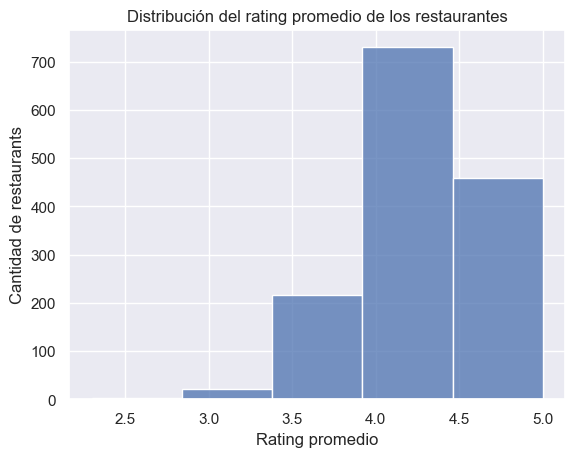

In [12]:
sns.histplot(data = latin_res, x = "avg_rating", stat="count", bins = 5)
plt.ylabel('Cantidad de restaurants')
plt.xlabel('Rating promedio')
plt.title('Distribución del rating promedio de los restaurantes')
plt.show()

Como podemos observar, **más de la mitad de los restaurantes** tiene una **valoración de 4 estrellas**.

Por último, controlamos la **cantidad de restaurantes por categoría**:

In [144]:
tabla_cat["category"].value_counts()

category
Mexican restaurant             1259
Taco restaurant                 223
Latin American restaurant       158
Burrito restaurant               77
Brazilian restaurant             12
Caribbean restaurant              7
Cuban restaurant                  6
Argentinian restaurant            6
Central American restaurant       5
Colombian restaurant              3
Chilean restaurant                1
Venezuelan restaurant             1
Yucatan restaurant                1
Ecuadorian restaurant             1
Name: count, dtype: int64

Como podemos observar, la **gran mayoría** son **restaurantes** de **comida mexicana**.

## Filtrado de Reviews - Restaurantes en California:

Una vez que ya contamos con los datos de los restaurantes latinoamericanos, lo único que nos quedaría por realizar es filtrar las reviews de dichos restaurantes:

In [142]:
# Se crea una lista con los valores unicos de los gmap_id de restaurantes latinoamericanos:
list_id = latin_res["gmap_id"].unique()

# Se filtran las reviews según el id:
reviews_latin = df_reviews[df_reviews["gmap_id"].isin(list_id)]
print(reviews_latin.shape)

(132524, 6)


Poseemos **más de 130.000 reviews** de **restaurantes latinoamericanos**.

Controlamos el **período temporal** del que disponemos información:

In [10]:
print("Fecha mínima:", reviews_latin["fecha"].min())
print("Fecha máxima:", reviews_latin["fecha"].max())

Fecha mínima: 2003-05-19 00:00:00
Fecha máxima: 2021-09-07 03:56:21.890000


Contamos con reviews de usuarios desde el año 2003 hasta Septiembre de 2021.

Luego controlamos la **distribución** del **rating** colocado por los usuarios en las reviews:

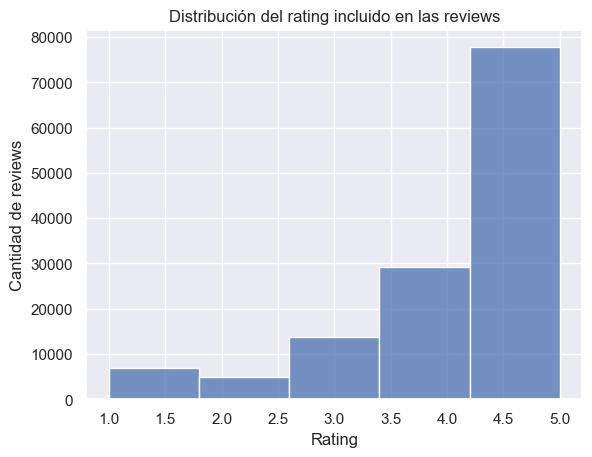

In [6]:
sns.histplot(data = reviews_latin, x = "rating", stat="count", bins = 5)
plt.ylabel('Cantidad de reviews')
plt.xlabel('Rating')
plt.title('Distribución del rating incluido en las reviews')
plt.show()

Como podemos observar, **más de la mitad de las reviews** fueron **muy positivas**, ya que superan las 4 estrellas.

Por último, exportamos las reviews a un archivo parquet:

In [143]:
# Se exporta el archivo en formato parquet:
reviews_latin.to_parquet('google_latin_reviews.parquet', engine="pyarrow")